# Análise Dataset Carros Usados

In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o dataset para ler informações

In [5]:
df = pd.read_csv('carros_usados.csv', sep=';')
df.tail(5)

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
7490,TRAIN,4625,37,NO,67131,FAMILY.MEDIUM,Domestic,5,FIVE,RED,BUICK,TX,BUICK.SKYLARK
7491,TEST,4024,37,NO,77425,LUXURY,Domestic,9,SEVEN+,GOLD,OTHER,TX,LINCOLN.TOWN CAR
7492,TRAIN,4910,33,NO,61011,LUXURY,Import,5,FIVE,BLUE,NISSAN,TX,NISSAN.ALTIMA
7493,TEST,4669,3,NO,81518,LUXURY,Import,6,SIX,WHITE,NISSAN,VA,NISSAN.ALTIMA
7494,VALIDATE,6078,69,NO,76281,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,FORD,NV,FORD.TAURUS


# Informações gerais sobre o dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [7]:
# convertendo primeiro as colunas para seus respectivos tipos de dados
df['vehicle.type'] = df['vehicle.type'].astype('category')
df['vehicle.age.group'] = df['vehicle.age.group'].astype('category')
df['domestic.import'] = df['domestic.import'].astype('category')
df['color.set'] = df['color.set'].astype('category')
df['state'] = df['state'].astype('category')
df['makex'] = df['makex'].astype('category')
df['make.model'] = df['make.model'].astype('category')
df['lot.sale.days'] = df['lot.sale.days'].astype('int')
df['mileage'] = df['mileage'].astype('int')
df['total.cost'] = df['total.cost'].astype('int')

In [8]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


# 1. Vendas e Estoques

# Qual é o tempo médio em dias que os veículos passam no lote antes de serem vendidos (lot.sale.days)?



In [9]:
mean1 = df['lot.sale.days'].mean()
print(f'Tempo médio em dias que os veículos passam no lote antes de serem vendidos: {mean1:.2f} dias')

Tempo médio em dias que os veículos passam no lote antes de serem vendidos: 76.45 dias


# Veículos de que tipo (vehicle.type) têm o menor tempo de venda?


In [10]:
mean2 = df.groupby(['vehicle.type'])
mean3 = mean2['lot.sale.days'].mean()  
minimum = mean3[mean3 == mean3.min()]
print(f'Veículos de que tipo {minimum.index[0]} têm o menor tempo de venda com {minimum.values[0]:.2f} dias')


Veículos de que tipo LUXURY têm o menor tempo de venda com 61.98 dias


/tmp/ipykernel_14929/1592069709.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean2 = df.groupby(['vehicle.type'])


# Como a quilometragem (mileage) influencia o tempo de venda (lot.sale.days)?

In [11]:
correlation = df['lot.sale.days'].corr(df['mileage'])
print(f'A correlação entre lot.sale.days e mileage é: {correlation:.2f}. \nIsso indica que há baixa ou inexistente correlação entre a quilometragem e o tempo de venda dos veículos.')

A correlação entre lot.sale.days e mileage é: 0.06. 
Isso indica que há baixa ou inexistente correlação entre a quilometragem e o tempo de venda dos veículos.


# Existe alguma diferença significativa no total.cost de veículos com cores diferentes (color.set)?

/tmp/ipykernel_14929/2737654660.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_color = z.groupby(['color.set']).mean().reset_index().sort_values(by='total.cost', ascending=False)


<Axes: xlabel='total.cost'>

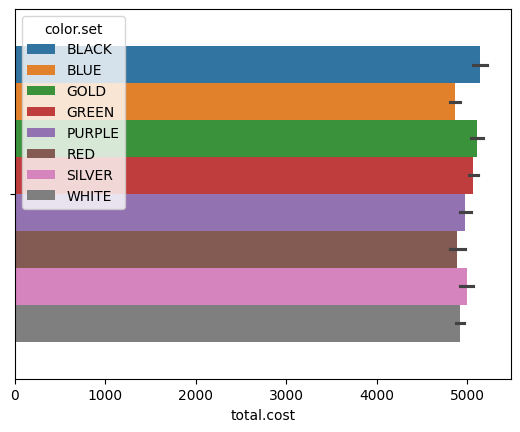

In [12]:
z = df[['total.cost', 'color.set']]
avg_color = z.groupby(['color.set']).mean().reset_index().sort_values(by='total.cost', ascending=False)
sns.barplot(data=z, x= 'total.cost', hue='color.set', fill=True)


# Cor de carro mais vendidas

In [13]:
z = df.groupby(['color.set']).count().sort_values(by='data.set', ascending=False) 
z

/tmp/ipykernel_14929/854410861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z = df.groupby(['color.set']).count().sort_values(by='data.set', ascending=False)


,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,makex,state,make.model
color.set,,,,,,,,,,,,
WHITE,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602
GREEN,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431
BLUE,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153
PURPLE,817,817,817,817,817,817,817,817,817,817,817,817
SILVER,721,721,721,721,721,721,721,721,721,721,721,721
GOLD,688,688,688,688,688,688,688,688,688,688,688,688
RED,614,614,614,614,614,614,614,614,614,614,614,614
BLACK,469,469,469,469,469,469,469,469,469,469,469,469




# Existe alguma correlação entre o vehicle.age (idade do veículo) e o total.cost (custo total)?


In [14]:
x = df[['total.cost', 'mileage']].corr().iloc[0, 1]

print(f'A correlação entre total.cost e mileage é: {x:.2f}. \nIsso indica que há uma correlação negativa fraca  entre o custo total e a quilometragem dos veículos.')

A correlação entre total.cost e mileage é: -0.13. 
Isso indica que há uma correlação negativa fraca  entre o custo total e a quilometragem dos veículos.


# 2. Preço e Custos



# Qual é o preço médio dos veículos vendidos, segmentado por state (estado)?


In [15]:
df.groupby(['state']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)

/tmp/ipykernel_14929/3731680575.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['state']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)


,total.cost
state,
GA,5123.230874
NV,5092.811245
TX,5065.806061
CA,5064.960861
AZ,4931.399261
VA,4881.094903
FL,4821.242279
NM,4691.565022


# Veículos importados (domestic.import) são, em média, mais caros que os domésticos?


In [16]:
z = df.groupby(['domestic.import']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)
print(z)
print(f'Os veículos importados são, em média, mais caros que os domésticos')

                  total.cost
domestic.import             
Import           5088.144105
Domestic         4932.471854
Os veículos importados são, em média, mais caros que os domésticos


/tmp/ipykernel_14929/1168113377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z = df.groupby(['domestic.import']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)


# Existe alguma diferença significativa no total.cost de veículos com cores diferentes (color.set)?

/tmp/ipykernel_14929/1265711160.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_cost = z.groupby(['color.set']).mean().reset_index().sort_values(by='total.cost', ascending=False)


Veículos pretos custam mais. Cores diferentes tem preços diferentes.


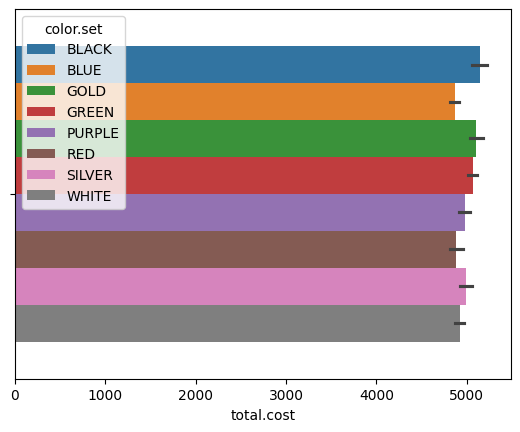

In [17]:
z = df[['total.cost', 'color.set']]
avg_total_cost = z.groupby(['color.set']).mean().reset_index().sort_values(by='total.cost', ascending=False)
sns.barplot(data=z, x='total.cost', hue='color.set', fill=True)
print("Veículos pretos custam mais. Cores diferentes tem preços diferentes.")

# Como o total.cost varia por vehicle.age.group (grupo de idade) e por tipo de veículo (vehicle.type)?


/tmp/ipykernel_14929/2614128504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z = df[['total.cost', 'vehicle.type', 'vehicle.age.group']].groupby(['vehicle.age.group', 'vehicle.type']).mean().reset_index().sort_values(by='vehicle.type', ascending=False)


<Axes: xlabel='total.cost', ylabel='vehicle.age.group'>

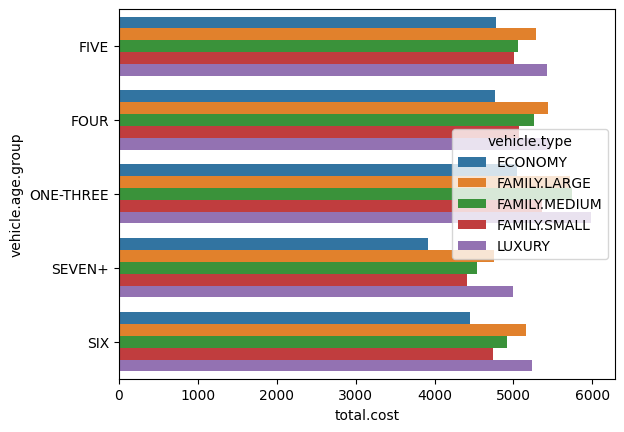

In [18]:
z = df[['total.cost', 'vehicle.type', 'vehicle.age.group']].groupby(['vehicle.age.group', 'vehicle.type']).mean().reset_index().sort_values(by='vehicle.type', ascending=False)
sns.barplot(data=z, x='total.cost', y='vehicle.age.group', hue = 'vehicle.type', fill=True)

In [19]:
z = df[['total.cost', 'vehicle.type']].groupby(['vehicle.type']).mean().reset_index().sort_values(by='total.cost', ascending=False)
print(z)

    vehicle.type   total.cost
4         LUXURY  5197.543501
1   FAMILY.LARGE  5082.039676
2  FAMILY.MEDIUM  4994.391175
3   FAMILY.SMALL  4923.364751
0        ECONOMY  4660.747925


/tmp/ipykernel_14929/3960981988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  z = df[['total.cost', 'vehicle.type']].groupby(['vehicle.type']).mean().reset_index().sort_values(by='total.cost', ascending=False)


# Quais marcas (makex) e modelos (make.model) são mais vendidas em cada estado?


In [20]:
w = df[['makex', 'make.model', 'state']].groupby(['state']).value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
topselling = w.loc[w.groupby('state')['count'].idxmax()].reset_index(drop=True).sort_values(by='count', ascending=False)
topselling

/tmp/ipykernel_14929/2719216578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w = df[['makex', 'make.model', 'state']].groupby(['state']).value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
/tmp/ipykernel_14929/2719216578.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topselling = w.loc[w.groupby('state')['count'].idxmax()].reset_index(drop=True).sort_values(by='count', ascending=False)


,state,makex,make.model,count
1,CA,NISSAN,NISSAN.SENTRA,138
6,TX,FORD,FORD.TAURUS,111
2,FL,NISSAN,NISSAN.SENTRA,103
3,GA,CHEVROLET,CHEVROLET.LUMINA,68
0,AZ,CHEVROLET,CHEVROLET.LUMINA,66
7,VA,FORD,FORD.TAURUS,40
5,NV,KIA,KIA.SEPHIA,15
4,NM,CHEVROLET,CHEVROLET.CORSICA,11


# Quais faixas etárias de veículos (vehicle.age.group) são mais comuns entre os veículos vendidos?

A média de idade dos veículos é de +6 anos, uma vez que mais da metade dos veículos vendidos tem mais de 6 anos de idade.


/tmp/ipykernel_14929/1949740063.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_age, x='vehicle.age.group', y='count', fill=True, palette='viridis', gap=0.5)


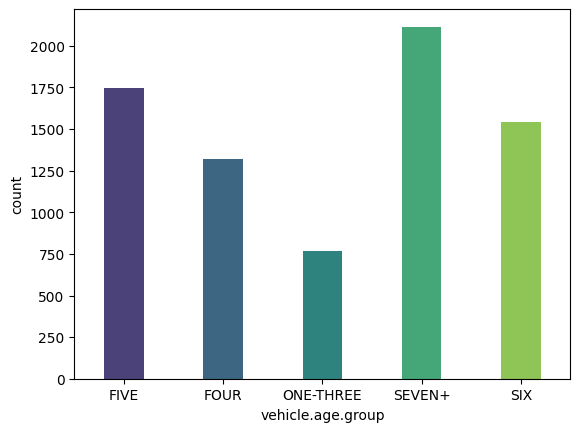

In [21]:
avg_age = df['vehicle.age.group'].value_counts().reset_index()
sns.barplot(data=avg_age, x='vehicle.age.group', y='count', fill=True, palette='viridis', gap=0.5)
avg_age['count'].mean()
print(f'A média de idade dos veículos é de +6 anos, uma vez que mais da metade dos veículos vendidos tem mais de 6 anos de idade.')

# Existe uma tendência sazonal nos lot.sale.days, com veículos sendo vendidos mais rapidamente em determinados meses ou estações?

<span style="color:#DE287D; font-weight: bold">Estação do ano não é tratado nesse dataset</span>


# Veículos mais antigos (vehicle.age) tendem a ser vendidos em períodos específicos do ano?

<span style="color:#DE287D; font-weight: bold">Período do ano não é tratado nesse dataset</span>

# Como a quilometragem (mileage) afeta o total.cost dos veículos, considerando diferentes tipos de veículo (vehicle.type)?

In [22]:
w = df.groupby('vehicle.type').apply(lambda x: x['mileage'].corr(x['total.cost']), include_groups=False).reset_index(name='correlation')
w



/tmp/ipykernel_14929/3775794842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w = df.groupby('vehicle.type').apply(lambda x: x['mileage'].corr(x['total.cost']), include_groups=False).reset_index(name='correlation')


,vehicle.type,correlation
0,ECONOMY,-0.167734
1,FAMILY.LARGE,-0.183703
2,FAMILY.MEDIUM,-0.256677
3,FAMILY.SMALL,-0.053493
4,LUXURY,-0.043447


# Quais características (ex.: vehicle.type, vehicle.age.group, domestic.import) mais influenciam o custo total?

Analisando como vehicle.age.group se relaciona com total.cost


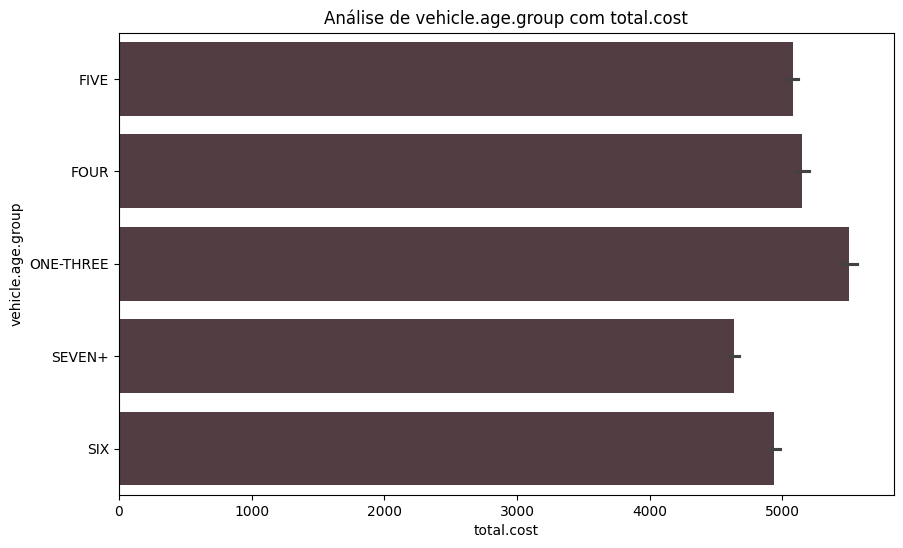

Analisando como vehicle.type se relaciona com total.cost


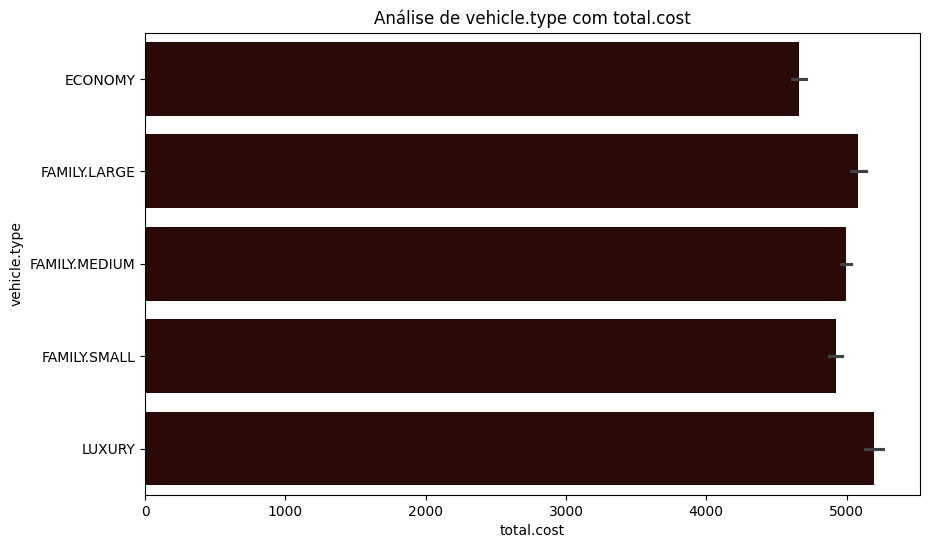

Analisando como domestic.import se relaciona com total.cost


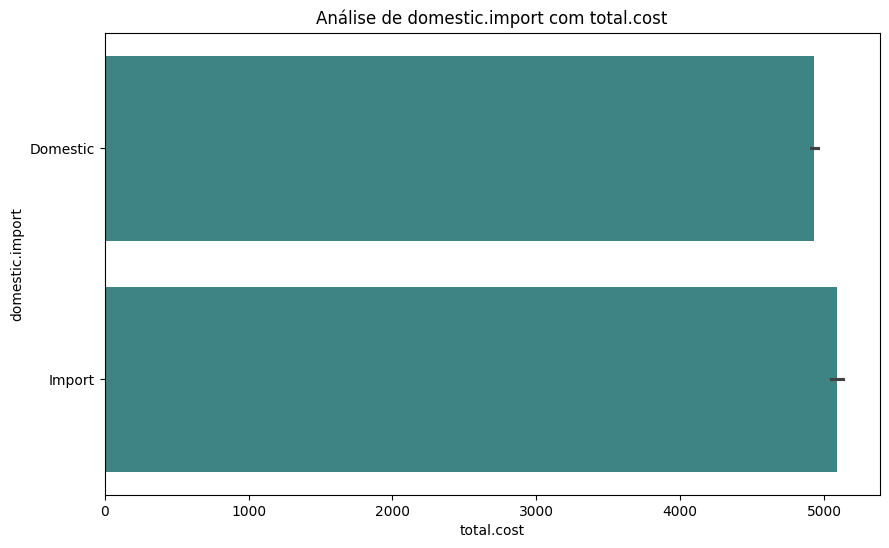

Tudo junto


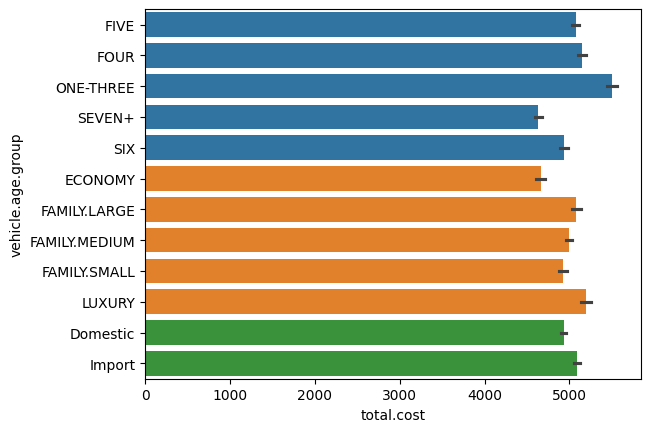

In [23]:
# Vehicle type 
colors = ['#553A41', '#2F0601', '#32908F']
w = ['vehicle.age.group', 'vehicle.type', 'domestic.import']
i = 0
for item in w:
    print(f'Analisando como {item} se relaciona com total.cost')
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='total.cost', y=item, fill=True, color=colors[i])
    plt.title(f'Análise de {item} com total.cost')
    plt.show() # se tirar essa linha, o gráfico sai em conjunto
    i+=1
    
print(f'Tudo junto')
for item in w:
   
    sns.barplot(data=df, x='total.cost', y=item, fill=True)


# Existem veículos que ficaram muito mais tempo no lote do que a média? Quais são suas características?

In [24]:
w = df.loc[df['lot.sale.days'] > df['lot.sale.days'].mean()]

z = w.value_counts()
print(f'Número de veículos que ficaram mais tempo no lote do que a média: {len(z)}')
print(f'Veículos que ficaram mais tempo no lote do que a média ({df["lot.sale.days"].mean():.2f} dias):')

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3):
    print(w[['lot.sale.days', 'mileage', 'vehicle.age.group']])

Número de veículos que ficaram mais tempo no lote do que a média: 3701
Veículos que ficaram mais tempo no lote do que a média (76.45 dias):
      lot.sale.days  mileage vehicle.age.group
0               135    67341            SEVEN+
1               114    72823               SIX
2               205    96330            SEVEN+
3               100    58519              FOUR
4               129    99057              FOUR
5               218    82771            SEVEN+
6               128    74255              FIVE
7               116    82594              FIVE
8               100    81167              FIVE
9               166    80519            SEVEN+
10              136    96373               SIX
11              105    85924              FIVE
12              123    86819               SIX
13              116    64722            SEVEN+
14              120    75798            SEVEN+
15               94    22239         ONE-THREE
16               96    93490              FIVE
17            

In [25]:
w['makex'].str.count('FORD').sum()
w['makex'].str.count('TOYOTA').sum()
w['makex'].str.count('DODGE').sum()

np.int64(113)

# Algum estado ou marca apresenta veículos com preços significativamente fora da média?


In [26]:
avg_price = df['total.cost'].mean()
marca_mais_cara = df.groupby(['makex']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)
estado_mais_caro = df.groupby(['state']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)

media = df['total.cost'].mean() 
estados_acima_media = estado_mais_caro[estado_mais_caro['total.cost'] > media]
marcas_acima_media = marca_mais_cara[marca_mais_cara['total.cost'] > media]
print(f'Marcas acima da média: ', marcas_acima_media)
print(f'\nEstados acima da média: ', estados_acima_media)


Marcas acima da média:               total.cost
makex                  
DAEWOO      6458.682692
HONDA       5432.797297
CADILLAC    5267.354839
TOYOTA      5240.295285
NISSAN      5153.110145
CHRYSLER    5144.337838
MITSUBISHI  5081.026087
PONTIAC     5063.244444
OTHER       5005.333333

Estados acima da média:          total.cost
state             
GA     5123.230874
NV     5092.811245
TX     5065.806061
CA     5064.960861


/tmp/ipykernel_14929/2733004606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marca_mais_cara = df.groupby(['makex']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)
/tmp/ipykernel_14929/2733004606.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estado_mais_caro = df.groupby(['state']).agg({'total.cost': 'mean'}).sort_values(by='total.cost', ascending=False)


# Estratégias de Marketing e Logística


# Qual é a cor mais popular (color.set) entre os veículos vendidos?


<Axes: ylabel='count'>

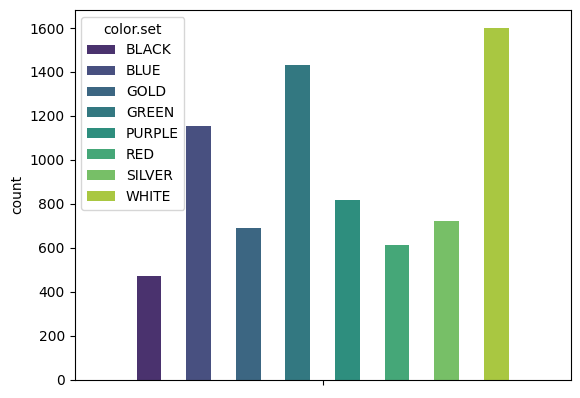

In [27]:
z = df['color.set'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
sns.barplot(data=z, hue='color.set', y='count', fill=True, palette='viridis', gap=0.5)

# Veículos de quais marcas ou modelos têm melhor desempenho em cada estado?

In [30]:
grouped = df.groupby(['state', 'make.model']).size().reset_index(name='count').sort_values(by='count', ascending=False)
grouped = grouped.loc[grouped.groupby('state')['count'].idxmax()].reset_index(drop=True)
print(grouped)
#sns.barplot(data=grouped, x='make.model', y='count', fill=True, palette='viridis', gap=0.5)

  state         make.model  count
0    AZ   CHEVROLET.LUMINA     66
1    CA      NISSAN.SENTRA    138
2    FL      NISSAN.SENTRA    103
3    GA   CHEVROLET.LUMINA     68
4    NM  CHEVROLET.CORSICA     11
5    NV         KIA.SEPHIA     15
6    TX        FORD.TAURUS    111
7    VA        FORD.TAURUS     40


/tmp/ipykernel_14929/3118915998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['state', 'make.model']).size().reset_index(name='count').sort_values(by='count', ascending=False)
/tmp/ipykernel_14929/3118915998.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grouped.loc[grouped.groupby('state')['count'].idxmax()].reset_index(drop=True)
